<a href="https://colab.research.google.com/github/Oliwer1992/kurs/blob/main/01_pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

### Ładowanie danych

In [3]:
def fetch_financial_data(company='AMZN'):
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')
df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2025-07-18 to 2020-07-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-18,225.140,226.400,222.980,226.130,37833807
2025-07-17,223.320,224.500,222.510,223.880,31855831
2025-07-16,225.875,226.100,222.180,223.190,39535926
2025-07-15,226.200,227.270,225.455,226.350,34907294
2025-07-14,225.070,226.660,224.240,225.690,35702597
...,...,...,...,...,...
2020-07-24,146.500,151.579,144.400,150.445,112648260
2020-07-23,154.914,154.914,148.500,149.328,113138120
2020-07-22,156.250,157.500,153.263,154.996,82084500


### Eksploracja danych

In [5]:
df.head() # 5 pierwszych wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-18,225.140,226.40,222.980,226.13,37833807
2025-07-17,223.320,224.50,222.510,223.88,31855831
2025-07-16,225.875,226.10,222.180,223.19,39535926
2025-07-15,226.200,227.27,225.455,226.35,34907294
2025-07-14,225.070,226.66,224.240,225.69,35702597


In [6]:
df.head(10) # 10 pierwszych wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-18,225.140,226.4000,222.980,226.13,37833807
2025-07-17,223.320,224.5000,222.510,223.88,31855831
2025-07-16,225.875,226.1000,222.180,223.19,39535926
2025-07-15,226.200,227.2700,225.455,226.35,34907294
2025-07-14,225.070,226.6600,224.240,225.69,35702597
2025-07-11,223.580,226.6799,222.370,225.02,50518307
2025-07-10,221.550,222.7900,219.700,222.26,30370591
2025-07-09,221.070,224.2900,220.470,222.54,38155121
2025-07-08,223.915,224.0000,218.430,219.36,45691987


In [8]:
df.tail() # 5 ostatnich wierszy, jak w head mozna w nawiasie określić ilość wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-24,146.500,151.579,144.400,150.445,112648260
2020-07-23,154.914,154.914,148.500,149.328,113138120
2020-07-22,156.250,157.500,153.263,154.996,82084500
2020-07-21,161.624,162.029,155.286,156.914,122699300
2020-07-20,150.010,160.068,149.701,159.842,151963520


In [9]:
df.columns # Zwraca nazwy kolumn

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.columns = [col.lower() for col in df.columns] # Zmienia wielkość liter w nazwach kolumn na małe
df.head()

,open,high,low,close,volume
Date,,,,,
2025-07-18,225.140,226.40,222.980,226.13,37833807
2025-07-17,223.320,224.50,222.510,223.88,31855831
2025-07-16,225.875,226.10,222.180,223.19,39535926
2025-07-15,226.200,227.27,225.455,226.35,34907294
2025-07-14,225.070,226.66,224.240,225.69,35702597


In [13]:
df.describe().T # Statystyka opisowa

,count,mean,std,min,25%,50%,75%,max
open,1256.0,1.571479e+02,3.468318e+01,82.80,1.321125e+02,1.605315e+02,1.782045e+02,2.390150e+02
high,1256.0,1.590455e+02,3.479664e+01,83.48,1.336600e+02,1.623455e+02,1.803547e+02,2.425200e+02
low,1256.0,1.550980e+02,3.448750e+01,81.43,1.304812e+02,1.586235e+02,1.763140e+02,2.380300e+02
close,1256.0,1.571055e+02,3.467360e+01,81.82,1.321175e+02,1.604550e+02,1.786360e+02,2.420600e+02
volume,1256.0,6.208639e+07,2.932419e+07,15007497.00,4.233596e+07,5.555170e+07,7.342725e+07,2.726617e+08


### Selekcja kolumn

In [14]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-07-18,225.140,226.4000,222.980,226.13,37833807
2025-07-17,223.320,224.5000,222.510,223.88,31855831
2025-07-16,225.875,226.1000,222.180,223.19,39535926
2025-07-15,226.200,227.2700,225.455,226.35,34907294
2025-07-14,225.070,226.6600,224.240,225.69,35702597
2025-07-11,223.580,226.6799,222.370,225.02,50518307
2025-07-10,221.550,222.7900,219.700,222.26,30370591
2025-07-09,221.070,224.2900,220.470,222.54,38155121
2025-07-08,223.915,224.0000,218.430,219.36,45691987


In [15]:
df['open'] # Wycinanie jako obiekt typu Series

,open
Date,
2025-07-18,225.140
2025-07-17,223.320
2025-07-16,225.875
2025-07-15,226.200
2025-07-14,225.070
2025-07-11,223.580
2025-07-10,221.550
2025-07-09,221.070
2025-07-08,223.915


In [16]:
df.open # Wycinanie jako obiekt typu Series

,open
Date,
2025-07-18,225.140
2025-07-17,223.320
2025-07-16,225.875
2025-07-15,226.200
2025-07-14,225.070
2025-07-11,223.580
2025-07-10,221.550
2025-07-09,221.070
2025-07-08,223.915


In [18]:
df[['open', 'close']] # Wycinanie jako obiekt typu DataFrame

,open,close
Date,,
2025-07-18,225.140,226.13
2025-07-17,223.320,223.88
2025-07-16,225.875,223.19
2025-07-15,226.200,226.35
2025-07-14,225.070,225.69
2025-07-11,223.580,225.02
2025-07-10,221.550,222.26
2025-07-09,221.070,222.54
2025-07-08,223.915,219.36


In [19]:
df.iloc[:, 0] # Wycinanie jako obiekt typu DataFrame pierwsza kolumna

,open
Date,
2025-07-18,225.140
2025-07-17,223.320
2025-07-16,225.875
2025-07-15,226.200
2025-07-14,225.070
2025-07-11,223.580
2025-07-10,221.550
2025-07-09,221.070
2025-07-08,223.915


In [21]:
df.iloc[:, [0, 3]] # Wycinanie jako obiekt typu DataFrame pierwsza i czwarta kolumna

,open,close
Date,,
2025-07-18,225.140,226.13
2025-07-17,223.320,223.88
2025-07-16,225.875,223.19
2025-07-15,226.200,226.35
2025-07-14,225.070,225.69
2025-07-11,223.580,225.02
2025-07-10,221.550,222.26
2025-07-09,221.070,222.54
2025-07-08,223.915,219.36


In [22]:
df.iloc[:, 3:5] # Wycinanie jako obiekt typu DataFrame kolumny 3 i 4

,close,volume
Date,,
2025-07-18,226.13,37833807
2025-07-17,223.88,31855831
2025-07-16,223.19,39535926
2025-07-15,226.35,34907294
2025-07-14,225.69,35702597
2025-07-11,225.02,50518307
2025-07-10,222.26,30370591
2025-07-09,222.54,38155121
2025-07-08,219.36,45691987


In [25]:
df.iloc[:, -1] # Wycinanie jako obiekt typu DataFrame ostatnia kolumna

,volume
Date,
2025-07-18,37833807
2025-07-17,31855831
2025-07-16,39535926
2025-07-15,34907294
2025-07-14,35702597
2025-07-11,50518307
2025-07-10,30370591
2025-07-09,38155121
2025-07-08,45691987


In [27]:
df.iloc[:, -2:] # Wycinanie jako obiekt typu DataFrame dwie ostatnie kolumny

,close,volume
Date,,
2025-07-18,226.13,37833807
2025-07-17,223.88,31855831
2025-07-16,223.19,39535926
2025-07-15,226.35,34907294
2025-07-14,225.69,35702597
2025-07-11,225.02,50518307
2025-07-10,222.26,30370591
2025-07-09,222.54,38155121
2025-07-08,219.36,45691987


### Selekcja wiersz

In [28]:
df

,open,high,low,close,volume
Date,,,,,
2025-07-18,225.140,226.4000,222.980,226.13,37833807
2025-07-17,223.320,224.5000,222.510,223.88,31855831
2025-07-16,225.875,226.1000,222.180,223.19,39535926
2025-07-15,226.200,227.2700,225.455,226.35,34907294
2025-07-14,225.070,226.6600,224.240,225.69,35702597
2025-07-11,223.580,226.6799,222.370,225.02,50518307
2025-07-10,221.550,222.7900,219.700,222.26,30370591
2025-07-09,221.070,224.2900,220.470,222.54,38155121
2025-07-08,223.915,224.0000,218.430,219.36,45691987


In [29]:
df.iloc[0] # Wycinanie 1 wiersza

,2025-07-18
open,225.14
high,226.40
low,222.98
close,226.13
volume,37833807.00


In [31]:
df.iloc[:3] # Wycinanie 0,1,2 wiersza

,open,high,low,close,volume
Date,,,,,
2025-07-18,225.140,226.4,222.98,226.13,37833807
2025-07-17,223.320,224.5,222.51,223.88,31855831
2025-07-16,225.875,226.1,222.18,223.19,39535926


In [32]:
df.loc['2025-07-18'] # Wycinanie wiersza po dacie

,2025-07-18
open,225.14
high,226.40
low,222.98
close,226.13
volume,37833807.00


In [36]:
df

,open,high,low,close,volume
Date,,,,,
2025-07-18,225.140,226.4000,222.980,226.13,37833807
2025-07-17,223.320,224.5000,222.510,223.88,31855831
2025-07-16,225.875,226.1000,222.180,223.19,39535926
2025-07-15,226.200,227.2700,225.455,226.35,34907294
2025-07-14,225.070,226.6600,224.240,225.69,35702597
2025-07-11,223.580,226.6799,222.370,225.02,50518307
2025-07-10,221.550,222.7900,219.700,222.26,30370591
2025-07-09,221.070,224.2900,220.470,222.54,38155121
2025-07-08,223.915,224.0000,218.430,219.36,45691987


In [49]:
df_sorted = df.sort_index(ascending=False) # Sortowanie po indeksie

### Obliczanie nowych kolumn

In [51]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2025-07-18 to 2020-07-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [52]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-18,90.880,91.17,89.405,90.59,14223531
2025-07-17,91.205,91.40,89.900,90.50,16903582
2025-07-16,92.660,92.75,89.810,90.75,17646529
2025-07-15,95.000,95.16,91.850,92.21,18488377
2025-07-14,95.300,95.48,93.560,93.89,14300220


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1256.0,5.025888e+01,1.841118e+01,2.037000e+01,3.414750e+01,4.654500e+01,6.613250e+01,9.750000e+01
High,1256.0,5.114891e+01,1.858246e+01,2.112550e+01,3.479997e+01,4.751000e+01,6.733500e+01,9.771500e+01
Low,1256.0,4.936437e+01,1.818616e+01,1.989500e+01,3.334500e+01,4.592000e+01,6.520500e+01,9.610000e+01
Close,1256.0,5.026596e+01,1.839311e+01,2.046000e+01,3.412750e+01,4.659000e+01,6.610250e+01,9.748000e+01
Volume,1256.0,2.377959e+07,1.628696e+07,5.200356e+06,1.560138e+07,2.011397e+07,2.768786e+07,3.642612e+08


In [56]:
df['Average'] = (df.Open + df.Close) / 2 # Obliczenie nowej kolumny
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-07-18,90.880,91.17,89.405,90.59,14223531,90.7350
2025-07-17,91.205,91.40,89.900,90.50,16903582,90.8525
2025-07-16,92.660,92.75,89.810,90.75,17646529,91.7050
2025-07-15,95.000,95.16,91.850,92.21,18488377,93.6050
2025-07-14,95.300,95.48,93.560,93.89,14300220,94.5950


In [58]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-07-20,32.48,33.925,32.350,33.66,16213609,33.070
2020-07-21,34.16,34.230,32.530,32.55,16743293,33.355
2020-07-22,32.44,32.880,32.330,32.66,12128382,32.550
2020-07-23,32.33,33.020,31.983,32.17,12749770,32.250
2020-07-24,31.74,31.800,30.470,31.18,16896059,31.460


In [63]:
df['Close_shift'] = df.Close.shift(1) # Przesunięcie kolumny o 1 wiersz w dół
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-07-20,32.48,33.925,32.350,33.66,16213609,33.070,NaN
2020-07-21,34.16,34.230,32.530,32.55,16743293,33.355,33.66
2020-07-22,32.44,32.880,32.330,32.66,12128382,32.550,32.55
2020-07-23,32.33,33.020,31.983,32.17,12749770,32.250,32.66
2020-07-24,31.74,31.800,30.470,31.18,16896059,31.460,32.17


In [68]:
df['Daily_Change'] = df.Close / df.Close_shift - 1 # Obliczenie procentowego rożnic między dwoma kolumnami
df.head(15)

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2020-07-20,32.48,33.925,32.350,33.66,16213609,33.070,NaN,NaN,NaN
2020-07-21,34.16,34.230,32.530,32.55,16743293,33.355,33.66,-0.032977,-0.032977
2020-07-22,32.44,32.880,32.330,32.66,12128382,32.550,32.55,0.003379,0.003379
2020-07-23,32.33,33.020,31.983,32.17,12749770,32.250,32.66,-0.015003,-0.015003
2020-07-24,31.74,31.800,30.470,31.18,16896059,31.460,32.17,-0.030774,-0.030774
2020-07-27,31.21,31.600,30.750,30.99,10182302,31.100,31.18,-0.006094,-0.006094
2020-07-28,30.79,31.240,30.350,30.81,12977145,30.800,30.99,-0.005808,-0.005808
2020-07-29,30.92,31.260,30.770,31.02,8215892,30.970,30.81,0.006816,0.006816
2020-07-30,30.65,30.680,29.970,30.24,13062912,30.445,31.02,-0.025145,-0.025145


In [69]:
del df['Daily Change'] # Usuwanie kolumny
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-07-20,32.48,33.925,32.350,33.66,16213609,33.070,NaN,NaN
2020-07-21,34.16,34.230,32.530,32.55,16743293,33.355,33.66,-0.032977
2020-07-22,32.44,32.880,32.330,32.66,12128382,32.550,32.55,0.003379
2020-07-23,32.33,33.020,31.983,32.17,12749770,32.250,32.66,-0.015003
2020-07-24,31.74,31.800,30.470,31.18,16896059,31.460,32.17,-0.030774


In [70]:
df.Daily_Change.min() # Wyznaczanie największego spadku

-0.11584196394322976

In [71]:
df.Daily_Change.max() # Wyznaczanie największego wzrostu

0.18902439024390238

<Axes: >

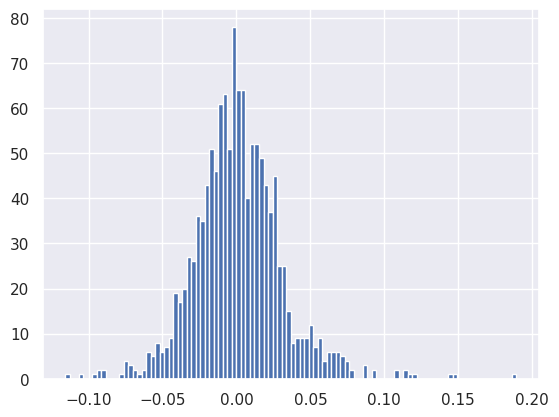

In [73]:
import seaborn as sns
sns.set()
df.Daily_Change.hist(bins=100) # Histogram

<Axes: xlabel='Date'>

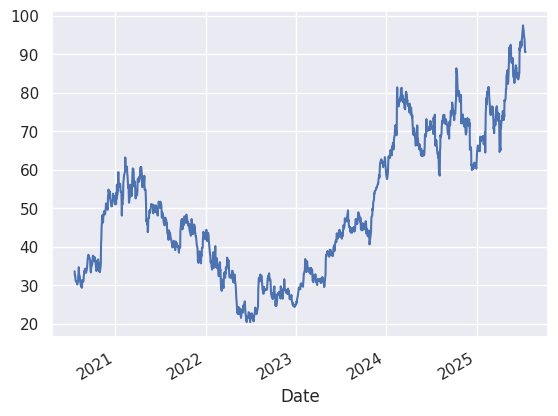

In [74]:
df.Close.plot() # Wykres liniowy

### Filtrowanie danych

In [75]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-07-20,32.480,33.925,32.350,33.66,16213609,33.0700,NaN,NaN
2020-07-21,34.160,34.230,32.530,32.55,16743293,33.3550,33.66,-0.032977
2020-07-22,32.440,32.880,32.330,32.66,12128382,32.5500,32.55,0.003379
2020-07-23,32.330,33.020,31.983,32.17,12749770,32.2500,32.66,-0.015003
2020-07-24,31.740,31.800,30.470,31.18,16896059,31.4600,32.17,-0.030774
...,...,...,...,...,...,...,...,...
2025-07-14,95.300,95.480,93.560,93.89,14300220,94.5950,95.39,-0.015725
2025-07-15,95.000,95.160,91.850,92.21,18488377,93.6050,93.89,-0.017893
2025-07-16,92.660,92.750,89.810,90.75,17646529,91.7050,92.21,-0.015833


In [76]:
df.Daily_Change > 0 # False mniejsze od 0, True większe

,Daily_Change
Date,
2020-07-20,False
2020-07-21,False
2020-07-22,True
2020-07-23,False
2020-07-24,False
...,...
2025-07-14,False
2025-07-15,False
2025-07-16,False


In [80]:
df_positive = df[df.Daily_Change > 0] # Wycina wiersze które spełniają warunek Daily_Change dodatnie

In [84]:
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-07-22,32.440,32.880,32.330,32.66,12128382,32.5500,32.55,0.003379
2020-07-29,30.920,31.260,30.770,31.02,8215892,30.9700,30.81,0.006816
2020-07-31,30.400,30.420,29.785,30.26,16360999,30.3300,30.24,0.000661
2020-08-03,30.240,31.295,30.060,31.19,17084299,30.7150,30.26,0.030734
2020-08-04,31.170,32.845,31.170,32.68,21958142,31.9250,31.19,0.047772
...,...,...,...,...,...,...,...,...
2025-06-30,91.685,93.385,91.520,93.30,16155270,92.4925,91.53,0.019338
2025-07-03,92.630,94.110,92.610,93.63,8112562,93.1300,92.05,0.017165
2025-07-07,93.880,97.120,93.540,96.68,29817173,95.2800,93.63,0.032575


In [85]:
df_positive.Daily_Change.mean() # Średnia z kolumny Daily_Change

np.float64(0.023401402268099114)

In [86]:
df_negative = df[df.Daily_Change < 0] # Wycina wiersze które spełniają warunek Daily_Change ujemne

In [87]:
df_negative.Daily_Change.mean() # Średnia z kolumny Daily_Change

np.float64(-0.02064819272337015)

In [89]:
df[df.Close == df.High] # Wypisuje gdzie warunek jest spełniony, cena zamknięcia była równa cenie najwyższej

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [90]:
df[df.Close == df.Low] # Wypisuje gdzie warunek jest spełniony, cena zamknięcia była równa cenie najniższej

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [95]:
df[df.index > '2020-08-31']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-09-01,33.450,34.510,33.145,34.30,16026170,33.8750,33.63,0.019923
2020-09-02,34.210,34.505,33.290,34.37,16552685,34.2900,34.30,0.002041
2020-09-03,34.080,34.740,32.950,33.41,17288823,33.7450,34.37,-0.027931
2020-09-04,33.330,33.650,31.550,33.24,17480617,33.2850,33.41,-0.005088
2020-09-08,32.360,35.100,32.160,34.32,33683493,33.3400,33.24,0.032491
...,...,...,...,...,...,...,...,...
2025-07-14,95.300,95.480,93.560,93.89,14300220,94.5950,95.39,-0.015725
2025-07-15,95.000,95.160,91.850,92.21,18488377,93.6050,93.89,-0.017893
2025-07-16,92.660,92.750,89.810,90.75,17646529,91.7050,92.21,-0.015833


In [96]:
df[(df.index >= '2020-09-01') & (df.index < '2020-09-25')] # Wycina wiersze z konkretnego zakresu dat

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-09-01,33.45,34.510,33.145,34.30,16026170,33.875,33.63,0.019923
2020-09-02,34.21,34.505,33.290,34.37,16552685,34.290,34.30,0.002041
2020-09-03,34.08,34.740,32.950,33.41,17288823,33.745,34.37,-0.027931
2020-09-04,33.33,33.650,31.550,33.24,17480617,33.285,33.41,-0.005088
2020-09-08,32.36,35.100,32.160,34.32,33683493,33.340,33.24,0.032491
2020-09-09,34.11,35.500,34.110,35.01,22803536,34.560,34.32,0.020105
2020-09-10,35.20,36.780,35.190,35.98,35468315,35.590,35.01,0.027706
2020-09-11,36.30,37.145,36.254,36.98,27130921,36.640,35.98,0.027793
2020-09-14,37.10,38.000,37.080,37.95,28016041,37.525,36.98,0.026230


In [97]:
df[(df.index == '2020-09-01') | (df.index == '2020-09-25')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-09-01,33.45,34.51,33.145,34.30,16026170,33.875,33.63,0.019923
2020-09-25,33.20,34.50,33.200,34.46,10736298,33.830,33.35,0.033283


In [98]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-07-20,32.480,33.925,32.350,33.66,16213609,33.0700,NaN,NaN
2020-07-21,34.160,34.230,32.530,32.55,16743293,33.3550,33.66,-0.032977
2020-07-22,32.440,32.880,32.330,32.66,12128382,32.5500,32.55,0.003379
2020-07-23,32.330,33.020,31.983,32.17,12749770,32.2500,32.66,-0.015003
2020-07-24,31.740,31.800,30.470,31.18,16896059,31.4600,32.17,-0.030774
...,...,...,...,...,...,...,...,...
2025-07-14,95.300,95.480,93.560,93.89,14300220,94.5950,95.39,-0.015725
2025-07-15,95.000,95.160,91.850,92.21,18488377,93.6050,93.89,-0.017893
2025-07-16,92.660,92.750,89.810,90.75,17646529,91.7050,92.21,-0.015833


In [102]:
df[df.index.month == 7] # Wycinanie wierszy dla miesiaca lipiec

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-07-20,32.480,33.925,32.350,33.66,16213609,33.0700,NaN,NaN
2020-07-21,34.160,34.230,32.530,32.55,16743293,33.3550,33.66,-0.032977
2020-07-22,32.440,32.880,32.330,32.66,12128382,32.5500,32.55,0.003379
2020-07-23,32.330,33.020,31.983,32.17,12749770,32.2500,32.66,-0.015003
2020-07-24,31.740,31.800,30.470,31.18,16896059,31.4600,32.17,-0.030774
...,...,...,...,...,...,...,...,...
2025-07-14,95.300,95.480,93.560,93.89,14300220,94.5950,95.39,-0.015725
2025-07-15,95.000,95.160,91.850,92.21,18488377,93.6050,93.89,-0.017893
2025-07-16,92.660,92.750,89.810,90.75,17646529,91.7050,92.21,-0.015833


In [103]:
df[df.index.year == 2020] # To samo dla roku

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-07-20,32.48,33.925,32.350,33.66,16213609,33.070,NaN,NaN
2020-07-21,34.16,34.230,32.530,32.55,16743293,33.355,33.66,-0.032977
2020-07-22,32.44,32.880,32.330,32.66,12128382,32.550,32.55,0.003379
2020-07-23,32.33,33.020,31.983,32.17,12749770,32.250,32.66,-0.015003
2020-07-24,31.74,31.800,30.470,31.18,16896059,31.460,32.17,-0.030774
...,...,...,...,...,...,...,...,...
2020-12-24,53.60,53.625,52.290,52.88,6316761,53.240,53.71,-0.015453
2020-12-28,53.02,53.130,51.560,51.97,12058981,52.495,52.88,-0.017209
2020-12-29,52.33,52.990,51.470,52.27,10140561,52.300,51.97,0.005773


In [104]:
df[df.index.day == 1] # Zwraca wszystkie 1 dni miesiaca

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-09-01,33.450,34.5100,33.145,34.30,16026170,33.8750,33.63,0.019923
2020-10-01,36.860,37.8282,36.580,37.14,19187502,37.0000,36.48,0.018092
2020-12-01,50.000,51.4100,49.070,49.63,20619101,49.8150,49.66,-0.000604
2021-02-01,52.120,52.9000,51.350,52.76,15570904,52.4400,50.93,0.035932
2021-03-01,53.670,54.7600,53.300,54.40,18481137,54.0350,51.75,0.051208
2021-04-01,55.610,57.6300,54.810,57.60,18703397,56.6050,54.51,0.056687
2021-06-01,51.620,51.6600,49.840,50.98,16583752,51.3000,50.83,0.002951
2021-07-01,50.880,51.6000,50.020,50.59,17732585,50.7350,50.12,0.009377
2021-09-01,39.980,41.6650,39.870,40.62,27788584,40.3000,39.14,0.037813
